In [43]:
#on commence par installer toutes les dépendances nécessaires pour le projet.

import warnings # on importe un package de warnings.C’est ce qui servira à ignorer les message d'avertissement
warnings.filterwarnings('ignore')
# on importe la bibliothèque Requests. C’est ce qui servira à effectuer des requêtes HTTP afin d'obtenir les données de la page web.
from requests import get
# on importe la bibliothèque Beautiful Soup. C’est ce qui servira à analyser le HTML.
from bs4 import BeautifulSoup
# on importe la bibliothèque pandas. C'est ce qui servira à manipuler et analyser les données et les tableaux.
import pandas as pd # on lui donne l'alias "pd" pour qu'il soit plus facile à etre appler dans le code
# on importe la fonction pyplot de la bibliothèque matplotlib. C’est ce qui servira à tracer et visualiser des données sous formes de graphiques.
import matplotlib.pyplot as plt # on lui donne un alias "plt"
# on importe la bibliothèque numpy qui est destinée à manipuler des matrices et tableaux multidimensionnels
import numpy as np #construction d'objet sous la forme de tableau  multidimensionnel qui nous permettons de realiser des calculs mathematiques complexes
from openpyxl import Workbook #on importe openpyxl qui permet de lire, écrire et modifier des fichiers .xlsx
import seaborn as sns#realisation de graphique tres avancé


In [44]:
#on initialise a vide les listes qui contiendront les données scrappées
notes = [] # Intialisation de la liste qui va contenir les notations et les nombre des avis pour chaque produit sous la forme en un classe bs4
nombre_avis =[] #Intialisation de la liste de nombre de avis pour chaque produit, ce dernier va etre extraire de la liste notes 
marque= [] # Inilalisation de la liste contenant les noms des marques de chaque produit 
nom_produit= [] #Inialisation de la liste contenant le nom de chaque produit qui appartient a la meme categorie choisie 
prix_intial=[] #Inialisaion de la liste contenant les prix avant remise 
remises = [] # Initalisation de la liste contenant les differentes remises propres a chaque produit 
prix_finaux = [] # Initalisation de la liste contenant les prix finaux apres l'application de la reduction 
descriptions = [] #Inialisation de la liste contenant une petit description de chaque produit 
indices = [] #Intilaisation de la liste indices qui sert a determiner les nombre de balise de span dans chaque element une liste qui va etre etablie dans le code d'extration de données de propres au tailles de chaque produit  
tailles = [] # Initalisation de la liste contenant les differenets tailles pour chaque produit 
notes_finales=[] #Intialisation de la liste contenant la notation de chaque de produit 
nombre_avis=[] #Initalisation de la liste contenant le nombre de avis attribut a chque produit 
nbrAvis=[] #Intialisation de la liste intermedaire qui va contenir le nombre des avis avant leurs traitement 

In [45]:
URL = "https://www.glisshop.com/ski/pack-ski-fix/" #URL contient l'url de la premiere page

page = "?pageNumber-15=" #la partie qui change de la prmeiere page par rapport aux autres et sert a construire un url dynamique 
                         #Exemple : https://www.glisshop.com/ski/pack-ski-fix/?pageNumber-15=2 : c'est la deuxieme page de notre site
                         #la variable "page" plus le nombre de page.
                         #dés la deuxieme page la difference entre deux pages reside seulement dans le nombre de page.
                         

for i in range(1,22):   #la boucle for nous permet de scrapper plusieurs pages en utlisant la logique base sur la difference entre les pages de notre site 
                        #notre site contient 21 pages, alors on fait range (1,22) car la valeur 22 est exclue de la boucle 
                        # i represente le nombre de page 
        
        
    if i==1:            #pour la 1er page url ne contient ni la variable page ni le nombre de page alors on va simplemet 
                        #ecraser la variable url par la valeur de URL
        url = URL 
        
    else:               #A partir de la deuxieme page on va ajouter la variable page et le nombre de page 
        
        url = f"{URL}{page}{i}" #on crée la page numero i en concatenant l'URL à page et i pour avoir la forme :
                                #https://www.glisshop.com/ski/pack-ski-fix/?pageNumber-15=2
        
    print(f"{i} page scraper, {22-i-1} restantes") #la une boucle qui indique a chaque fois la page scrapée et les nombres de pages restants
                                                   #restant a scraper
    
    repense = get(url)                            #la fonction get de la library requests permet de renvoyer dans la variable "repense" le contenu de la page web
                                                  #c'est une requette HTTP qui renvoie 
    
    html_soup = BeautifulSoup(repense.text, 'html.parser') #le Beautifulsoup objet va analyser la repense.text grace a son html.parser,
                                                           #ce dernier permet d'analyser et parcourir le document HTML.

    
    #On commence par determiner la balise qui divise chaque produit et qui contient toutes les donnnées a scraper 
    #la varible produits represente une liste de type classe bs4 qui contient tout la balise "div" avec un attribut 
    #classe "col-6 col-lg-4 d-flex m-b_20 justify-content-center product-list-item"
    #la fonction find_all va extraire ces div conteneurs
    
    produits=html_soup.find_all('div', class_ ='col-6 col-lg-4 d-flex m-b_20 justify-content-center product-list-item')
    
    #La boucle for parcourt la liste de produits element par element afin d'extraire a chaque fois la partie qui nous interesse
    #et qui repersente l'information recherchée
    
    for produit in produits : 
        
        #Dans ce qui suite on va utiliser la methode de find ou bien find_all qui vont extraire des valeurs de type classe bs4
        #permettant de parcourir l'hiearchie d'une balise et extraire sa valeur en utlisant plusieurs methodes.
        
        nom= produit.find("div", class_="product-brand d-block f-s-mob_14") #la variable "nom" va contenir le nom de la marque 
                                                                            #de chaque produit.
                                                                            #le nom de la marque est specifie par une balise 'div' 
                                                                            #et un attribut class = product-brand d-block f-s-mob_14.
                    
        #On va verifier l'absence de valeur afin d'eviter l'erreur :"AttributeError: 'NoneType' object has no attribute 'text' " : 
        
        if nom==None: #Si nom egal None, il exprime alors l'absence de valeur,alors il n'existe pas un nom marque et donc on peut pas appliquer
                      #la methode text pour extraire le texte de la balise.
                
            marque.append("pub") #si la condition est verifie alors ce class represente une publicite et non un produit et donc la liste
                                 #marque va etre alimenté par une chaine de caractere sous le nom de "pub" c-a-d publicité.
                
        else :                             
                                           #sinon on va descendre dans l'hiearchie pour extraire le text de la balise "span" en passant par
            marque.append(nom.a.span.text) #la balise "a" et on va ajouter cette valeur à la liste marque.
            
        
        nom2= produit.find("span", class_="product-label_title") #maintant on va extraire le nom de produit dans la variable nom2
                                                                 #de type classe bs4. ce dernier est caracterise par une balise "span"
                                                                 #et un attribut class = "product-label_title".
        
        
        #On va verifier encore une fois l'absence de valeur afin d'eviter l'erreur :
        #"AttributeError: 'NoneType' object has no attribute 'text' " :  
        
        
        if nom2==None: #Si nom2 egal None,donc il exprime l'absence de valeur,alors il n'existe pas un nom de produit et donc on peut pas appliquer
                       #la methode text pour extraire le texte de la balise.
        
        
            nom_produit.append("pub") #si la condition est verifie alors ce class represente une publicite et non un produit et donc la liste
                                      #nom_produit va etre alimenté par une chaine de caractere sous le nom de "pub" c-a-d publicité.
            
        else : 
            
            nom_produit.append(nom2.text) #sinon on va extraire le contenu de la balise "span" en passant par
                                                               #la methode text. En suite on va ajouter cette valeur dans la liste
                                                               #de nom de produit.
            
        prix1 = produit.find('p', class_="advice-price__price")#maintenant on va extraire le prix inital dans la variable prix1
                                                               #de type classe bs4. ce dernier est caracteriser par une balise "p"
                                                               #et un attribut class_="advice-price__price".
       
    
        #On va verifier encore une fois l'absence de valeur afin d'eviter l'erreur :
        #"AttributeError: 'NoneType' object has no attribute 'text' " :  
        
        if prix1==None: #Si prix1 egale None, alors elle exprime l'absence de valeur,alors il n'existe pas un prix initial avant reduction 
                        #pour un tel produit et donc on ne peut pas appliquer la methode texte pour extraire le texte de la balise.
                        
                
            prix_intial.append("EV") #si la condition est verifie alors ce class represente un produit sans prix intial donc la liste
                                      #prix_intial va etre alimente par une chaine de caractere sous le nom de "EV" c-a-d empty value.
        else:
            
            prix_intial.append(prix1.text.replace("\xa0€","").replace('\u202f',"").strip().replace(" ",""))
                                                                                       #sinon on va extraire le contenu de la balise "P" en passant par
                                                                                       #la methode text et on va nettoyer le texte par la methode "replace"
                                                                                       #en remplacant la chaine "\xa0€",'\u202f' et les espaces par le vide. Aussi,
                                                                                       #on utlise la methode strip() pour retirer les caractères d'espacement au début 
                                                                                       # et a la fin de la chaine comme "\n\t" du prix intial.
                                                                                     
        

        remise = produit.find('p', class_="advice-price__percent-discount-text")    #la variable "remise" va contenir le taux de reduction pour un produit.
                                                                                    #la remise accordée est specifie par une balise 'p' 
                                                                                    #et un attribut class = advice-price__percent-discount-text.
        
        #On va verifier encore une fois l'absence de valeur afin d'eviter l'erreur :
        #"AttributeError: 'NoneType' object has no attribute 'text' " :  
        
        if remise==None:   #Si remise egal None, alors elle exprime l'absence de valeur,alors il n'existe pas une remise pour un tel produit
                           #et donc on ne peut pas appliquer la methode text pour extraire le texte de la balise.
                
            remises.append(0)  #si la condition est verifie alors on va alimente la liste de remises par la valeur 0
       
                
        else : 
            
            remises.append(int(remise.text.replace('%',''))) #Sinon on utlise la methode text et ensuite on applique 
                                                             #la methode replace qui replace les % par le vide afin 
                                                             #d'applique correctement la methode int qui transforme 
                                                             #dans notre car le type string en entier 
            
        prix = produit.find("span", class_="price-value is-discount")           #la variable "prix" va contenir le prix final apres
                                                                                # l'application de la remise.le prix final est specifie
                                                                                #par une balise 'span' et un attribut class_="price-value is-discount". 
                                                                                

        #On va verifier encore une fois l'absence de valeur dans la variable prix afin d'eviter l'erreur :
        #"AttributeError: 'NoneType' object has no attribute 'text' " sur le prix.
        
        if (prix==None): 
            
        #On va verifier dans un deuxieme lieu l'existance de la balise 'span' et d'attribut class_="price-value" 
        #qui est propre aux produits qui ne proposent pas une reduction et dans cette meme verification on va tester
        #l'absence de valeur afin d'eviter l'erreur :"AttributeError: 'NoneType' object has no attribute 'text'              
        #si il n'exite ni un produit sans reduction donc on va avoir None et donc
        #on ne peut pas appliquer la methode texte.    
        
            if (produit.find('span', class_="price-value") == None): 
                
                prix_finaux.append(0)  #donc on va alimenter la liste de remises par la valeur 0
                
            else :
              
       #sinon on va extraire le contenu de la balise "span" prope a l'arribut class_="price-value" tout en passant 
       #par la methode text et on va nettoyer le texte par la methode "replace"en remplacant'\xa0€' et les espaces par la methode strip par le vide. 

                prix_finaux.append(produit.find('span', class_="price-value").text.replace('\xa0€',"").strip())
        else :
                            
       #sinon si il exite un produit avec reduction et non un produit sans reduction et donc on va ajouter le contenu de la 
       #balise propre a la produit avec remise tout en remplacant '\xa0€' par le vide et les espaces par la methode strip().
       #aussi on va remplacer le virgule par un point afin de faciliter sa conversion en nombre décimal.
        
            prix_finaux.append(prix.text.replace('\xa0€',"").replace(',','.').strip()) 
            
            
        nombre=produit.find('span', class_="reviews-rating__caption") #la variable "nombre" de type class bs4 va contenir le prix final apres
                                                                      #la deduction de montant de remise.le prix final est specifie par une balise 'span'
                                                                      # et un attribut class_="reviews-rating__caption". 

        #on verifie si ce nombre est vide ou pas pour bien appliquer la methode text et eviter les erreurs
        
        if nombre==None: #si la variable nombre est egal a None (vide) donc : 
            
            nbrAvis.append("0") #on ajoute "0" à la liste "nbrAvis" (nombre des avis) via la methode append.
            
        else :                  
            
            nbrAvis.append(nombre.text) #sinon on applique la methode text pour extraire le contenu de la balise et l'affecter
                                        #dans la liste nombre de avis.
       #Dans cette etape on va nettoyer les element de la liste nbrAvis:
    
        for element in nbrAvis :
            
       #Initalement on verifie si un des elements de la liste nbrAvis est vide 
            if element=="": #si c'est vrai alors la liste finale "nombre_avis" a integrer dans notre dataset va contenir 0 pour cette postion. 
                nombre_avis.append("0")
            else :
                nombre_avis.append(element.replace(" avis","")) #sinon on affecte la valeur de l'element mais en supprimant 
                                                                #le mot avis pour garder que les chiffres sous la forme de string.
                                                                #pour le convertir facilement en un nombre decimal.
                        
        #On va extraire la description de chaque produit, cette derniere est specifiée par la balise "span" et l'attribut
        #class : "product-description line-clamp line-clamp_2 f-s-mob_12".                
                        
        description = produit.find("span",class_="product-description line-clamp line-clamp_2 f-s-mob_12") 
        

        #On va verifier encore une fois l'absence de valeur pour la variable description pour chaque produit 
        #afin d'eviter l'erreur :"AttributeError: 'NoneType' object has no attribute 'text' ".
        
        
        if description==None: #on verifie si ce nombre est vide ou pas pour bien appliquer la methode text et eviter les erreurs
            
            descriptions.append("EV")# si la condition est vrai alors on ajoute "EV" c-a-d "Empty value" a notre liste de descriptions
            
        else :        
            
            descriptions.append(description.text.replace("\xa0","")) #sinon on va extraire le contenu de la balise "span" en passant par
                                                                    #la methode text et on va nettoyer le texte par la methode "replace"
                                                                    #en remplacant la chaine "\xa0€"par le vide.
                                                    
        #On traite maintenant les tailles disponibles pour chaque produit     
        taille_ = produit.find('ul', class_="product-axis justify-content-center")#Extraction de la balise 'ul'et l'attribut
                                                                                  #class :"product-axis justify-content-center".
                                                                                  #ces deux derniers contienent toutes les tailles
                                                                                  #pour chaque produit.
                    

        #pour extraire les tailles on va utiliser la strategie suivantes puisque la balise 'ul' comporte la balise 'span' qui se
        #repete dans son hiearchie et donc si on decide d'extraire de chaque balise la methode find va extraire seulement la 1er 
        #occurence de 'span'.Pour resoudre ce probleme on va proceder de la maniere suivante:
        
        #on va creer une liste qui compte le nombre d'occurence de la balise de 'span' dans la chaine crée via la conversion
        #de la variable taille_ de type classe bs4 en string pour qu'on puisse appliquer ensuite la methode count.
        
        #On va verifier encore une fois l'absence de valeur pour la variable "taille_" de type class bs4 afin d'eviter l'erreur :
        #"AttributeError: 'NoneType' object has no attribute 'text' ".
        
        if taille_== None: #Si elle est vide alors on alimente la liste des indices par 0 c-a-d que ce produit n'a pas des tailles
                           #disponibles.
            
            indices.append(0)     
            
        else :            #Sinon la liste des indices va contenir l'occurence de mot span divisé par 2.
        

        #En effet, chaque indice recuperé va etre devisé par deux car chaque span et suivi d'une balise de fermture.Cette occurence
        #va etre diviser par deux. L'indice de chaque produit est egal au nombre des tailles disponibles.
        #On applique la methode int pour convertir la chaine de caractere de taille en un entier.   
            indice = int(str(taille_).count('span'))//2
            indices.append(indice)
        #Maintenat la variable taille_ va contenir tous les tailles de chaque produit. elle va contenir toutes les balises 'span'     
        taille_ = produit.find_all('span', class_="d-inline-block p-r_10 p-l_10 font-size_small product-list_pictogram nowrap")
        tailles.append(str(taille_))#la liste tailles va contenir la valeur de "taille_" converti en chaine de caractere.
                                    #find_all()a renvoyé une liste contenant tous les span qui nous intéressent.
            
        for i in range(0,len(indices)):
            
        #Exemple : <ul class="product-axis justify-content-center"><li class="d-lg-inline-block product-axis-item">
        #<span class="d-inline-block p-r_10 p-l_10 font-size_small product-list_pictogram nowrap"> 100</span></li>
        #<li class="d-lg-inline-block product-axis-item"><span class="d-inline-block p-r_10 p-l_10 font-size_small 
        #product-list_pictogram nowrap">
            
        #Dans la boucle for on va parcourir la liste "tailles" en utilisant la liste indices pour remplacer les deux chaines suivante:
        #**<span class="d-inline-block p-r_10 p-l_10 font-size_small product-list_pictogram nowrap">\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t'
        #**'\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t</span>'
        #par le vide '' afin d'extraire correctement les tailles.
        
        #on utilise les elements de la liste des indices en tant que un argument dans la methode replace afin d'indiquer de combien
        #de fois on va remplacer les deux chaines de caractere ci-dessous alors on va recuperer seulement la taille sous forme
        #d'une chaine de caractere et l'affecter ensuite dans la liste de tailles tout en ecrasnt la valeur initale de chaque element
        #de la liste "tailles"
        
        
            tailles[i]=tailles[i].replace('<span class="d-inline-block p-r_10 p-l_10 font-size_small product-list_pictogram nowrap">\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t','',indices[i]).replace('\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t</span>','',indices[i])
        
        #Passant maintenant a la recuperation de note de chaque produit:
        #
        
        note = produit.find("span", {"aria-hidden":"true","class":"reviews"})

        #la variable "note" va contenir la balise de de chaque produit.Elle est specifié par la balise 'span' ainsi que 
        #deux attributs :class = reviews et aria-hidden = true.

                
        #On va verifier encore une fois l'absence de valeur afin d'eviter l'erreur :
        #"AttributeError: 'NoneType' object has no attribute 'text' " :  
        
        if note == None : #Si la note n'existe pas alors la liste notes va contenir la valeur "Empty value"
            
            notes.append("EV")
            
        else :           #Sinon on ajoute a la liste notes la valeur de note sous la forme d'une chaine de caractere
                         #afin d'appliquer les methodes propre au type string
            
            notes.append(str(note)) 
            
        for i2 in range(0,len(notes)) :
            
                        #le boucle for permet de parcourir les elements de notre liste notes notre objectif est d'effectuer 
                        #le slicing sur le chaine de caractere note.
            
            a= notes[i2] #la variable a va contenir le premier element indixé par l'indice i.
                         #la boucle for est limitée par la longeur de la liste indices qui est egale au nombre de produit
                
            if (a =="EV"):#On va verifier encore une fois l'absence de valeur afin d'eviter l'erreur :
                           #"AttributeError: 'NoneType' object has no attribute 'text'
                    
                notes_finales.append("0")#si a est vide alors la notation est egal 0 c-a-d que le produit est sans note.
                
            else:
                                       #Sinon on va appliquer maintenant la methode de slicing sur le string pour extraire 
                                       #la notation qui existe entre l'indice 55 et 58.Ensuite on passe au nettoyage de la 
                                       #nouvelle chaine en remplcant le "s" et l'espace par le vide.
                                       #on ajout la nouvelle chaine dans la liste de notes finales.
                            
                notes_finales.append(a[55:58].replace('s','').replace(' ',''))    
        
                
     #un dernier nettoyage de la liste prix intial et la liste prix finaux en remplacant les Caractère Unicode des espaces '\u202f'
     # par la methode de repalce(), afin de convertir efficacement ce dernier en un nombre decimal
        
for i in range(0,len(prix_finaux)) :
    
    prix_finaux[i] = str(prix_finaux[i]).replace('\u202f',"")
    
for i in range(0,len(prix_intial)) :#dans cette boucle on applique la methode replace que sur l' element qui peut contenir'\u202f'
                                    #et donc pour eviter les erreurs on effectue un test sur la valeur de chaque element de la liste.
    if prix_intial[i]=="EV": #si l'element d'indice i egal "EV" alors on passe a l'element suivant
        continue
    else:
        prix_intial[i] = str(prix_intial[i]).replace('\u202f',"") #sinon on effectue la replacement sur l'element de la liste 
         


1 page scraper, 20 restantes
2 page scraper, 19 restantes
3 page scraper, 18 restantes
4 page scraper, 17 restantes
5 page scraper, 16 restantes
6 page scraper, 15 restantes
7 page scraper, 14 restantes
8 page scraper, 13 restantes
9 page scraper, 12 restantes
10 page scraper, 11 restantes
11 page scraper, 10 restantes
12 page scraper, 9 restantes
13 page scraper, 8 restantes
14 page scraper, 7 restantes
15 page scraper, 6 restantes
16 page scraper, 5 restantes
17 page scraper, 4 restantes
18 page scraper, 3 restantes
19 page scraper, 2 restantes
20 page scraper, 1 restantes
21 page scraper, 0 restantes


In [46]:
# Creation et ouverture du fichier csv sous le nom de "data.csv" en mode ecriture "w+ ". (+ pour crée le fichier si il n'existe pas)
f = open("data.csv", "w+",encoding='utf-8');
# L'ajout de l'en-tete du tableau dans le fichier csv
f.write("Produit,La marque,Description produit,Tailles disponibles,Nombre de tailles,Prix initial,Remise,Prix final,Notation,Nombre avis\n");
#parcours des données recuperées
for x in range(0, 595):
    if nom_produit[x] != 'pub': #on ignore si c'est une publicité
        #Ajout des données dans le fichier csv en effectuant un formatage
        #Ajout de "," a la fin de chaque instruction pour separer les elements et respecter le format de ficher csv
        f.write(nom_produit[x].strip()+',')#on supprime tous espace eventuelle pour eviter les erreurs via la methode strip
        f.write(marque[x]+',')
        f.write(descriptions[x].replace(",","")+',')#on supprime la "," a l'interieur de chaque description afin d'eviter une division non utile
        f.write(str(tailles[x]).strip('[,]').replace(",","")+',')#on remplace les "," par "" dans le tailes(pour pas perturber le lecteur csv) 
                                                                 #et remplace les [] de la liste tailles puisque elle est formée par des listes par "" 
        f.write(str(indices[x])+',')#meme principe 
        f.write(prix_intial[x].replace(",",".")+',')#on remplace les "," par "" dans le nombre(pour pas perturber le lecteur csv) puis on ajoute egalement une virgule à la fin.
        f.write(str(remises[x])+',')#meme principe 
        f.write(str(prix_finaux[x]).replace(",",".")+",")#meme principe 
        f.write(notes_finales[x]+",")#meme principe 
        f.write(nombre_avis[x])#meme principe 
        f.write("\n");#retour à la ligne apres chaque tuple ajouté

#lecture du ficher csv et stockage des donnée dans la variable "data"
dataset = pd.read_csv('data.csv',sep=',',on_bad_lines='skip') #on specifie le separateur 
# affichage des lignes du tableau avec la fonction head en specifiant le nombre de ligne en paramètre
#data.head(len(marque))

dataset.head(10)#affichage de les premiers lignes de notre data
dataset.to_excel("projetpythonIMSD.xlsx")#creation d'un fichier excel grace à la fonction to_excel

 # Nettoyage de données/ prepocessing

In [47]:
pd.set_option('display.max_rows', None) #Augmentation de nombre des lignes à afficher

#on va remplacer le prix intial de valeur "EV" par la valeur de prix final car on n'a pas un taux de reduction à appliquer alors le prix est stable.
for i in dataset.index: #on va parcourir via les lignes propres aux colonnes seleconnes par la methode de l'indixing en utilisant
                        #la methode index sur notre dataset
    if dataset['Prix initial'][i] =='EV':                   #on verifie si le prix intial est marqué vide 
        dataset['Prix initial'][i]=dataset['Prix final'][i] #alors ce produit ne propose pas une reduction 
                                                            #et donc son prix consiellé ou bien intial va etre egal a son prix final  

#on va supprimer les lignes qui contient au moins une valeur manquante           
dataset.dropna()


,Produit,La marque,Description produit,Tailles disponibles,Nombre de tailles,Prix initial,Remise,Prix final,Notation,Nombre avis
0,Pack Ski Alpin Experience 80 Carbon Xpress + Fix,Rossignol,Le ski Rossignol Experience 80 Carbon Xpress e...,150 158 166 174 182,5,489.9,0,489.90,5.0,5
1,Pack Ski Alpin Atris + Fix,Black Crows,Modèle phare chez Black Crows l’Atris revient ...,178 184 189,3,819.90,-17,679.90,5.0,5
2,Pack Ski Alpin Captis + Fix,Black Crows,Le Black Crows Captis est un ski all mountain ...,172 184,2,679.90,-13,584.90,5.0,1
3,Pack Ski Alpin Disruption 78 Ti Quikclik Hp +...,K2,Le K2 Disruption 78Ti Quikclik Hp est un petit...,156 163 170 177,4,819.90,-39,499.90,5.0,5
4,Pack Ski Alpin Disruption 78c Quikclik + Fix,K2,Le Disruption 78c Quikclik est un ski piste dé...,163 170 177,3,615.00,-34,399.90,5.0,1
5,Pack Ski Alpin Slight 83 E + Fix,Scott,Le Slight 83 E est un ski all mountain dévelop...,168 178 184,3,729.90,-36,459.90,5.0,1
6,Pack Ski Alpin Slight 93 E + Fix,Scott,Le Slight 93 E est un ski all mountain Scott a...,170 175 180 185,4,779.90,-35,499.90,5.0,5
7,Pack Ski Alpin V-Shape V4 Xl Lyt-pr + Fix,Head,Le ski all mountain Head V-Shape V4 Xl Lyt-pr ...,156 163 170 177,4,499.90,-30,349.90,5.0,1
8,Pack Ski Alpin Amphibio 13 C Ps + Fix,Elan,Idéal pour un skieur intermédiaire ou confirmé...,152 160 176,3,499.90,-30,349.90,4.0,1
9,Pack Ski Alpin Camox + Fix,Black Crows,Le Camox de chez Black Crows est un ski all mo...,174 180 186,3,849.90,-15,714.90,5.0,5


In [48]:
#changement de type des variables pour effecter les operations mathematique correctement :

for i in dataset.index: #on va parcourir les elements de chaque colonne via la methode d'indexiation
                     #transformation des chiffres de type string :
    dataset['Notation'][i]=(dataset['Notation'][i]).astype(float)# en un nombre decimal
    dataset['Prix final'][i]=np.float64(dataset['Prix final'][i]).astype(float)# en un nombre decimal
    dataset['Prix initial'][i]=np.float64(dataset['Prix initial'][i]).astype(float)# en un nombre decimal
    dataset['Nombre avis'][i]=np.float64(dataset['Nombre avis'][i]).astype(float)# en un nombre decimal
    
    


# Analyse des données


In [49]:
#la statistique descrptive de notre base de données :
dataset.describe() 


,Nombre de tailles,Remise,Prix final,Notation,Nombre avis
count,586.000000,586.000000,586.000000,586.000000,586.000000
mean,2.749147,-13.319113,570.927543,2.285324,1.578498
std,1.114109,11.521910,235.303355,2.376492,2.440712
min,1.000000,-51.000000,0.000000,0.000000,0.000000
25%,2.000000,-20.000000,432.650000,0.000000,0.000000
50%,3.000000,-13.000000,584.900000,0.000000,0.000000
75%,4.000000,0.000000,686.650000,5.000000,2.000000
max,6.000000,0.000000,1669.900000,5.000000,9.000000


<AxesSubplot:>

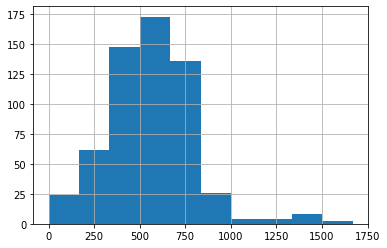

In [35]:
#Distribution de prix:
#Affichage de la distribution de prix des produit via un histogramme qui contient les valeurs de la colonne prix final.
dataset['Prix final'].hist()

<AxesSubplot:ylabel='Notation'>

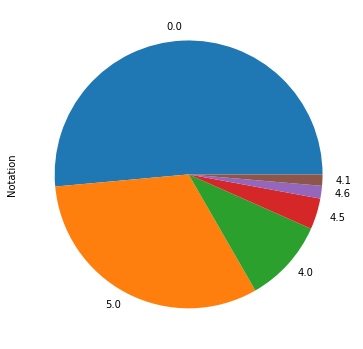

In [38]:
#determiner l'avis la plus frequante
#affichage de graphique sous forme de camonbert qui presente la frequence de chaque note dans notre dataset
plt.figure(figsize=(6,8)) #on fixe la taille de notre graphique
dataset["Notation"].value_counts().plot.pie()

In [39]:
#division des notre dataset en produits notés et produit non notés:
#classification des données avec avis et sans avis
data_note= dataset[dataset['Notation']!=0.0]
data_reste= dataset[dataset['Notation']==0.0]

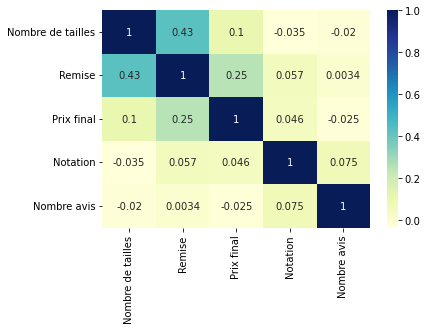

In [40]:
#Analyse de correlation
#on affiche un tableau qui present les correclations entre les variables quantitatives.
#on va calculer la correlation dans la data set data_note qui contient que les produits avec une notation
dataplot=sns.heatmap(data_note.corr(), cmap="YlGnBu", annot=True) 
#annot = True : indique dans chaque cellule la valeur c-a-d pour annoter la carte thermique au lieu des données.
#cmap : indique la couleur de matplotlib ou aussi une grille de couleurs comme dans notre cas.

In [41]:
#Classement de TOP10 marque le plus demandé en se basant la somme de note chaque marque pour l'ensemble de ses produits
#creation d'un tableau qui regroupe par la marque les differents notes possibles.
tab_classement=data_note.groupby("La marque")["Notation"].sum().sort_values(ascending=False)[0:10]
#sort_values(ascending=False): indique un sens de classement descendant 
#[0:10]: on affiche que les dix premiers lignes
tab_classement=pd.DataFrame(tab_classement)#transformation de tableau en dataframe
tab_classement['Classement']=range(1,11) #creation d'une colonne de classement qui contient des valeur de 1 a 10

tab_classement

,Notation,Classement
La marque,,
Rossignol,155.7,1
Salomon,134.4,2
Dynastar,123.1,3
Black Crows,115.0,4
K2,92.0,5
Atomic,84.5,6
Elan,83.0,7
Volkl,82.0,8
Head,70.0,9


In [42]:
#Classement des produits de meme categorie qui ont la  note la plus elevée et qui ont plus de nombre des avis au meme temps.
#On utilise la methode de boolean indexing pour extraire de data_note, les notes qui ont une notation egales a 5 etoiles 
#et apres on va passer au classement des produits en se basant sur le nombre de notes le plus elevé.
data_classement = data_note[data_note['Notation']==5.0].sort_values(by='Nombre avis', ascending=False)
#sort_values(ascending=False): indique un sens de classement descendant 
#[0:20]: on affiche que les vingt premieres lignes
data_classement[1:20]

,Produit,La marque,Description produit,Tailles disponibles,Nombre de tailles,Prix initial,Remise,Prix final,Notation,Nombre avis
475,Pack Ski Alpin Revolt 84 + Fix,Volkl,Idéal pour les skieurs expérimentés le Völkl R...,174 180 186,3,659.9,-14,566.9,5.0,9
200,Pack Ski Alpin M-Free 99 + Fix,Dynastar,Le ski freestyle backcountry Dynastar M-Free 9...,171 179,2,735.0,-13,635.0,5.0,9
220,Pack Ski Alpin Redster Q9.8 Revoshock S + Fix,Atomic,Réservé aux skieurs possédant un très bon nive...,173 181,2,1099.8,0,1099.8,5.0,9
241,Pack Ski Alpin Supershape Team Easy Jrs JR + Fix,Head,Le ski enfant Head Supershape Team Easy Jrs JR...,127 137 147 157,4,199.9,0,199.9,5.0,9
263,Pack Ski Alpin Stance W 80 + Fix,Salomon,Le ski femme all-mountain Salomon Stance W 80 ...,151 159 167 175,4,499.9,0,499.9,5.0,9
286,Pack Ski Alpin Black Pearl 97 + Fix,Blizzard,Le Black Pearl 97 de chez Blizzard est un ski ...,159 165 171,3,779.9,-17,639.9,5.0,9
310,Pack Ski Alpin Corvus + Fix,Black Crows,Le Black Crows Corvus est un ski freeride au s...,176 183 188,3,819.9,-23,629.9,5.0,9
361,Pack Ski Alpin Fly Two 95 + Fix,Movement,Le Fly Two 95 de chez Movement c’est un ski fr...,171,1,599.0,-24,454.2,5.0,9
388,Pack Ski Alpin Kore 93 + Fix,Head,Le ski all mountain homme Kore 93 de chez Head...,163 170 177 184 191,5,829.9,-13,719.9,5.0,9
416,Pack Ski Alpin Missy E + Fix,K2,Le ski pour jeune fille Missy de chez K2 est u...,109 119 129,3,219.9,0,219.9,5.0,9
